<center>
# Text Mining 2018

## Assignment 1
</center><div class="pull-right">
김제경 20176005 
이희랑 20186014  
</div>


### Assignment 1 : Vector Space Model
Try to understand the basic idea of pre-processing, construct vector space representation for specific text documents, and compute similarity based on TF-IDF weighting among different text documents.

### Package Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag, pos_tag_sents
from collections import Counter
from scipy.spatial.distance import pdist,squareform
import numpy as np

%matplotlib inline

###  
### Data Loading

In [12]:
path = 'E:\\unist\\2-1\\social\\'
data = pd.read_csv(path+'beers1875.csv')
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ABV,appearance,aroma,beerID,brewerId,name,overall,palate,profileName,style,taste,text,time
0,7,3/5,7/10,51,12,Chimay Rouge (Red) / Premire,14/20,3/5,azlondon,Abbey Dubbel,8/10,Appearance,1214524800
1,7,3/5,7/10,51,12,Chimay Rouge (Red) / Premire,14/20,4/5,blipp,Abbey Dubbel,7/10,Bottle. Pours cloudy brown with a fizzy beige...,1214179200
2,7,4/5,8/10,51,12,Chimay Rouge (Red) / Premire,15/20,4/5,Goba,Abbey Dubbel,7/10,Finally one of the Chimay familly! Got this o...,1214092800
3,7,4/5,7/10,51,12,Chimay Rouge (Red) / Premire,11/20,2/5,uhre,Abbey Dubbel,8/10,"Pours brown colour with a tint of red, the he...",1214092800
4,7,3/5,5/10,51,12,Chimay Rouge (Red) / Premire,17/20,4/5,metsbcd,Abbey Dubbel,8/10,"Very good beer, had it at a Mortons. Appearan...",1213747200


#  
## 1. Do Pre-Processing

### Normalization
1. Acronym -> Fully representative
> LSTM -> long short term memory
2. Remove duplicates
> Contextual Decomposition (CD) -> Contextual Decomposition
3. Proper noun -> Common noun
> Yelp -> corporation
4. Upper case -> Lower case

1.1. Normalization

In [13]:
data['text'] = data['text'].str.lower()
data.head()

,ABV,appearance,aroma,beerID,brewerId,name,overall,palate,profileName,style,taste,text,time
0,7,3/5,7/10,51,12,Chimay Rouge (Red) / Premire,14/20,3/5,azlondon,Abbey Dubbel,8/10,appearance,1214524800
1,7,3/5,7/10,51,12,Chimay Rouge (Red) / Premire,14/20,4/5,blipp,Abbey Dubbel,7/10,bottle. pours cloudy brown with a fizzy beige...,1214179200
2,7,4/5,8/10,51,12,Chimay Rouge (Red) / Premire,15/20,4/5,Goba,Abbey Dubbel,7/10,finally one of the chimay familly! got this o...,1214092800
3,7,4/5,7/10,51,12,Chimay Rouge (Red) / Premire,11/20,2/5,uhre,Abbey Dubbel,8/10,"pours brown colour with a tint of red, the he...",1214092800
4,7,3/5,5/10,51,12,Chimay Rouge (Red) / Premire,17/20,4/5,metsbcd,Abbey Dubbel,8/10,"very good beer, had it at a mortons. appearan...",1213747200


###  
### Tokenization
Split sentences to words list by using non-word character

1.1. Tokenization:  tokenize each document into tokens

In [15]:
# Tokenize
doc = pd.DataFrame()
doc['name'] = data.name
doc['contents'] = data['text'].str.strip().str.split('[\W_]+')
doc.head()

,name,contents
0,Chimay Rouge (Red) / Premire,[appearance]
1,Chimay Rouge (Red) / Premire,"[bottle, pours, cloudy, brown, with, a, fizzy,..."
2,Chimay Rouge (Red) / Premire,"[finally, one, of, the, chimay, familly, got, ..."
3,Chimay Rouge (Red) / Premire,"[pours, brown, colour, with, a, tint, of, red,..."
4,Chimay Rouge (Red) / Premire,"[very, good, beer, had, it, at, a, mortons, ap..."


In [16]:
doc['contents'].dropna(inplace=True)
doc.head()

,name,contents
0,Chimay Rouge (Red) / Premire,[appearance]
1,Chimay Rouge (Red) / Premire,"[bottle, pours, cloudy, brown, with, a, fizzy,..."
2,Chimay Rouge (Red) / Premire,"[finally, one, of, the, chimay, familly, got, ..."
3,Chimay Rouge (Red) / Premire,"[pours, brown, colour, with, a, tint, of, red,..."
4,Chimay Rouge (Red) / Premire,"[very, good, beer, had, it, at, a, mortons, ap..."


In [17]:
# Remove null element in tokens
doc['contents'] = doc['contents'].apply(lambda x: [a for a in x if a!=''])
doc.head()

,name,contents
0,Chimay Rouge (Red) / Premire,[appearance]
1,Chimay Rouge (Red) / Premire,"[bottle, pours, cloudy, brown, with, a, fizzy,..."
2,Chimay Rouge (Red) / Premire,"[finally, one, of, the, chimay, familly, got, ..."
3,Chimay Rouge (Red) / Premire,"[pours, brown, colour, with, a, tint, of, red,..."
4,Chimay Rouge (Red) / Premire,"[very, good, beer, had, it, at, a, mortons, ap..."


In [18]:
doc.head()

,name,contents
0,Chimay Rouge (Red) / Premire,[appearance]
1,Chimay Rouge (Red) / Premire,"[bottle, pours, cloudy, brown, with, a, fizzy,..."
2,Chimay Rouge (Red) / Premire,"[finally, one, of, the, chimay, familly, got, ..."
3,Chimay Rouge (Red) / Premire,"[pours, brown, colour, with, a, tint, of, red,..."
4,Chimay Rouge (Red) / Premire,"[very, good, beer, had, it, at, a, mortons, ap..."


In [7]:
doc['contents'].dropna(inplace=True)

In [20]:
len(doc)

1304719

###  
### Pos Tagging
Pos tagging for making stop word list

###  
### Stemming
1.2. Stemming: stem the tokens back to their root form. 

In [19]:
# Stemming
st = PorterStemmer()
doc['contents'] = doc['contents'].apply(lambda x: [st.stem(a) for a in x])
doc.head()

,name,contents
0,Chimay Rouge (Red) / Premire,[appear]
1,Chimay Rouge (Red) / Premire,"[bottl, pour, cloudi, brown, with, a, fizzi, b..."
2,Chimay Rouge (Red) / Premire,"[final, one, of, the, chimay, familli, got, th..."
3,Chimay Rouge (Red) / Premire,"[pour, brown, colour, with, a, tint, of, red, ..."
4,Chimay Rouge (Red) / Premire,"[veri, good, beer, had, it, at, a, morton, app..."


In [ ]:
doc.to_csv(path+'stem.csv', index=False)

In [24]:
l = [c for content in doc['contents'] for c in content ]
l

['appear',
 'bottl',
 'pour',
 'cloudi',
 'brown',
 'with',
 'a',
 'fizzi',
 'beig',
 'head',
 'aroma',
 'is',
 'like',
 'peel',
 'appl',
 'skin',
 'with',
 'hint',
 'of',
 'caramel',
 'and',
 'spice',
 'medium',
 'bodi',
 'flavor',
 'ha',
 'a',
 'gener',
 'fruit',
 'sweet',
 'as',
 'well',
 'as',
 'a',
 'light',
 'spici',
 'note',
 'nice',
 'final',
 'one',
 'of',
 'the',
 'chimay',
 'familli',
 'got',
 'thi',
 'one',
 'at',
 'a',
 'local',
 'market',
 'wa',
 'surpris',
 'to',
 'see',
 'it',
 'there',
 'lie',
 'in',
 'the',
 'shelf',
 'pour',
 'a',
 'veri',
 'pretti',
 'copper',
 'brown',
 'with',
 'a',
 'beig',
 'foam',
 'goe',
 'for',
 'some',
 'fruit',
 'in',
 'the',
 'aroma',
 'with',
 'strong',
 'malt',
 'charact',
 'along',
 'with',
 'spici',
 'some',
 'honey',
 'to',
 'it',
 'as',
 'well',
 'fruiti',
 'flavor',
 'with',
 'spice',
 'note',
 'malt',
 'and',
 'also',
 'some',
 'wheat',
 'ester',
 'evid',
 'special',
 'in',
 'the',
 'lightli',
 'bitter',
 'aftertast',
 'also',
 'so

###  
### Remove Stop Words

1.3. Stopword removal: remove stopwords. 

In [8]:
vect = CountVectorizer(stop_words='english')
corpus1 = vect.fit_transform(df['all'].tolist()).toarray()

,id,title,contents
0,0,"[word, import, use, contextu, decomposit, extr...","[drive, forc, recent, success, long, short, te..."
1,1,"[gener, wikipedia, summar, long, sequenc]","[show, gener, english, wikipedia, articl, can,..."
2,2,"[mask, gener, adversari, network, better, text...","[recurr, neural, network, are, common, method,..."
3,3,"[natur, text, speach, synthesi, condit, gener,...","[paper, describ, neural, network, model, neura..."
4,4,"[shape, share, privat, encod, decod, text, sty...","[supervis, train, abstract, languag, gener, mo..."


In [9]:
stops2 = ['be', 'when', 'been', 'up', 'most', 'out', 'm', 'due', 'same',\
          'more', 'multi', 'such', 'own', 'there', 'overal']
doc['title'] = doc['title'].apply(lambda x: [a for a in x if a not in stops2])
doc['contents'] = doc['contents'].apply(lambda x: [a for a in x if a not in stops2])
doc['all'] = doc['title'] + doc['contents']
doc.head()

,id,title,contents,all
0,0,"[word, import, use, contextu, decomposit, extr...","[drive, forc, recent, success, long, short, te...","[word, import, use, contextu, decomposit, extr..."
1,1,"[gener, wikipedia, summar, long, sequenc]","[show, gener, english, wikipedia, articl, can,...","[gener, wikipedia, summar, long, sequenc, show..."
2,2,"[mask, gener, adversari, network, better, text...","[recurr, neural, network, are, common, method,...","[mask, gener, adversari, network, better, text..."
3,3,"[natur, text, speach, synthesi, condit, gener,...","[paper, describ, neural, network, model, neura...","[natur, text, speach, synthesi, condit, gener,..."
4,4,"[shape, share, privat, encod, decod, text, sty...","[supervis, train, abstract, languag, gener, mo...","[shape, share, privat, encod, decod, text, sty..."


###  
### Making Our TF-IDF Matrix
We define TF on title and contents respectively because we think that title is more important than contents. So our process is divided in two steps (for title and contents).

In [10]:
# ID별 단어 리스트(contents)
rows = list()
for row in doc[['id', 'contents']].iterrows():
    r = row[1]
    for word in r['contents']:
        rows.append((r.id, word))

content_words = pd.DataFrame(rows, columns=['id', 'word'])
content_words.head()

,id,word
0,0,drive
1,0,forc
2,0,recent
3,0,success
4,0,long


In [11]:
# ID별 단어 리스트(title)
rows = list()
for row in doc[['id', 'title']].iterrows():
    r = row[1]
    for word in r['title']:
        rows.append((r.id, word))

title_words = pd.DataFrame(rows, columns=['id', 'word'])
title_words.head()

,id,word
0,0,word
1,0,import
2,0,use
3,0,contextu
4,0,decomposit


In [12]:
# ID별 단어 리스트(all)
rows = list()
for row in doc[['id', 'all']].iterrows():
    r = row[1]
    for word in r['all']:
        rows.append((r.id, word))

all_words = pd.DataFrame(rows, columns=['id', 'word'])
all_words.head()

,id,word
0,0,word
1,0,import
2,0,use
3,0,contextu
4,0,decomposit


In [13]:
# Content word count
content_counts = content_words.groupby('id')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
content_counts.head()

n_w
id word           
0  term          5
   decomposit    4
   long          4
   memori        4
   short         4

In [14]:
# Title word count
title_counts = title_words.groupby('id')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
title_counts.head()

n_w
id word           
0  contextu      1
   decomposit    1
   extract       1
   import        1
   interact      1

In [15]:
# All word count
all_counts = all_words.groupby('id')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
all_counts.head()

n_w
id word           
0  term          6
   decomposit    5
   long          5
   memori        5
   short         5

In [16]:
x = all_words\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'count'})
x.reset_index(inplace=True)
x.head()

,index,count
0,learn,42
1,robot,28
2,gener,27
3,model,24
4,reinforc,20


#  
## 2. Understand Zipf's Law

2.2. Generate a curve for Zipf's law. 

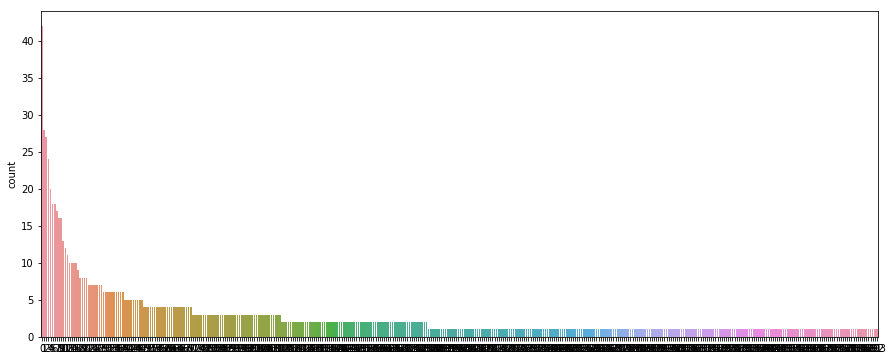

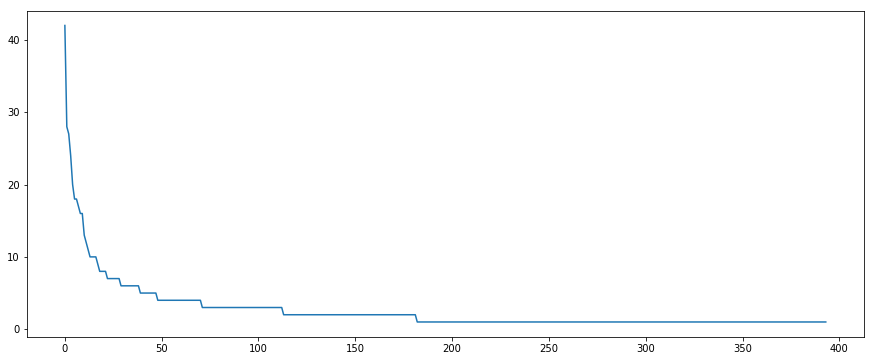

In [17]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(x.index, x['count'])
plt.show()
plt.figure(figsize=(15,6))
plt.plot(x.index, x['count'])
plt.show()

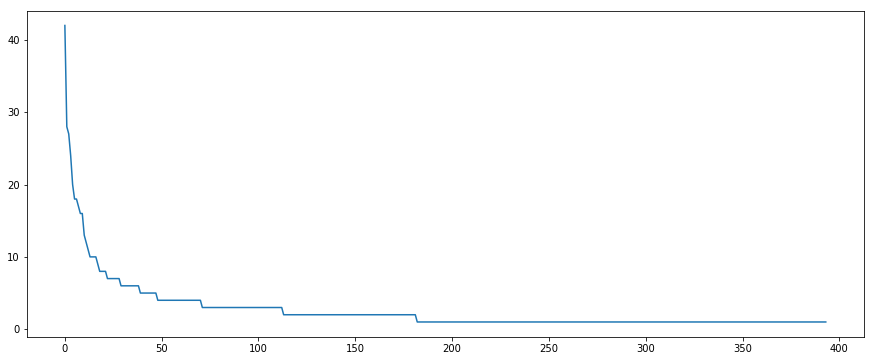

In [18]:
plt.figure(figsize=(15,6))
plt.plot(x.index, x['count'])

In [19]:
x['count'].describe()

count    394.000000
mean       2.703046
std        3.957875
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       42.000000
Name: count, dtype: float64

In [20]:
print('\n', 'Highly Frequent Words')
x[x['count']>10]['index'] 


 Highly Frequent Words


0         learn
1         robot
2         gener
3         model
4      reinforc
5         train
6           use
7       network
8        polici
9          task
10    adversari
11       neural
12         base
Name: index, dtype: object

In [21]:
print('\n', 'Barely Frequent Words')
x[x['count']==1]['index'].iloc[:12]


 Barely Frequent Words


182           neg
183       analysi
184        origin
185    furthermor
186          abil
187        modifi
188           key
189          dump
190        import
191    experiment
192        scribe
193        impact
Name: index, dtype: object

We didn't apply Zipf's law.  
1. Top N frequent words : After removing stop words, top frequent words look important for us.
2. Bottom N frequent words : We think most of words are important because abstract of paper are very short document. Also half of vocabulary appear just one time, after applying Zipf's law our similarity result was poor.

#  
## 3. Construct a Vocabulary  
### TF
Define TF applying BM25 on content. The reason why we choose K=5 is that we want to give less weight on words with over 3 frequency and more weight on words from 1 to 3 frequency.

3.1. List the resulting vocabulary. 

In [22]:
x['index'].unique()

array(['learn', 'robot', 'gener', 'model', 'reinforc', 'train', 'use',
       'network', 'polici', 'task', 'adversari', 'neural', 'base', 'long',
       'can', 'demonstr', 'show', 'style', 'are', 'sequenc', 'sampl',
       'navig', 'evalu', 'map', 'text', 'deep', 'manipul', 'condit', 'is',
       'time', 'architectur', 'short', 'predict', 'probabilist', 'languag',
       'complex', 'real', 'agent', 'term', 'supervis', 'rang', 'method',
       'word', 'perform', 'distribut', 'decomposit', 'road', 'memori',
       'extract', 'compar', 'better', 'forc', 'plan', 'skill', 'end',
       'enabl', 'combin', 'physic', 'dynam', 'algorithm', 'spectrogram',
       'environ', 'media', 'asynchron', 'score', 'experi', 'achiev',
       'propos', 'complet', 'ha', 'multipl', 'featur', 'constraint',
       'system', 'applic', 'sensor', 'decod', 'mean', 'scale', 'singl',
       'search', 'set', 'abstract', 'recurr', 'document', 'abl', 'paper',
       'collect', 'articl', 'improv', 'captur', 'human', 'resu

In [23]:
# BM 25
c_tf = content_counts.copy()
k=5
c_tf['tf'] = (k+1)*c_tf.n_w/(c_tf.n_w+k)
c_tf.head()

n_w        tf
id word                     
0  term          5  3.000000
   decomposit    4  2.666667
   long          4  2.666667
   memori        4  2.666667
   short         4  2.666667

In [24]:
c_tf['tf'].describe()

count    607.000000
mean       1.341809
std        0.621082
min        1.000000
25%        1.000000
50%        1.000000
75%        1.714286
max        4.125000
Name: tf, dtype: float64

####  
We do not apply BM25 transformation on title's TF because most of words appear just one time. 

In [25]:
title_counts['n_w'].value_counts()

1    82
2     3
Name: n_w, dtype: int64

In [26]:
t_tf = title_counts.copy()
t_tf.columns = ['tf']
t_tf.head()

tf
id word          
0  contextu     1
   decomposit   1
   extract      1
   import       1
   interact     1

In [27]:
c_tf.reset_index(inplace=True)
t_tf.reset_index(inplace=True)

###  
###  Define Weight on TF
We think title of paper has more meaningful vocabulary than abstract of paper.   Therefore we give 0.7 weight on title and 0.3 weight on abstract. Then our final TF is weighted sum of them.

In [28]:
tf = pd.merge(t_tf, c_tf, on=['word', 'id'], how='outer').drop('n_w', axis=1).fillna(0)
tf['tf'] = tf['tf_x']*0.7 + tf['tf_y']*0.3
tf.columns = ['id', 'word', 'title_tf', 'abstract_tf', 'tf']
tf.head()

,id,word,title_tf,abstract_tf,tf
0,0,contextu,1.0,1.000000,1.0
1,0,decomposit,1.0,2.666667,1.5
2,0,extract,1.0,1.000000,1.0
3,0,import,1.0,0.000000,0.7
4,0,interact,1.0,0.000000,0.7


###  
### IDF
We follow general IDF formula.

In [29]:
c_d = all_words.id.nunique()
idf = all_words.groupby('word')\
    .id\
    .nunique()\
    .to_frame()\
    .rename(columns={'id':'i_d'})\
    .sort_values('i_d')
    
idf['idf'] = np.log(c_d/idf.i_d.values)
idf.reset_index(inplace=True)
idf.head()

,word,i_d,idf
0,abil,1,2.302585
1,output,1,2.302585
2,outperform,1,2.302585
3,otherwis,1,2.302585
4,origin,1,2.302585


In [30]:
tfidf = pd.merge(tf, idf, on=['word'], how='outer').drop(['i_d', 'title_tf', 'abstract_tf'], axis=1).fillna(0)
tfidf['tfidf'] = tfidf['tf'] * tfidf['idf']
tfidf.head()

,id,word,tf,idf,tfidf
0,0,contextu,1.000000,2.302585,2.302585
1,0,decomposit,1.500000,2.302585,3.453878
2,0,extract,1.000000,1.609438,1.609438
3,1,extract,0.514286,1.609438,0.827711
4,0,import,0.700000,2.302585,1.611810


#####  
3.2. List top 50 and bottom 50 words according to TF in the resulting vocabulary, and represent their corresponding IDFs.

In [31]:
print('Top 50 words by TF')
tfidf[tfidf['id']==0].sort_values('tf', ascending=False)[:50]

Top 50 words by TF


,id,word,tf,idf,tfidf
13,0,term,1.600000,2.302585,3.684136
11,0,short,1.500000,1.609438,2.414157
1,0,decomposit,1.500000,2.302585,3.453878
7,0,long,1.500000,1.203973,1.805959
10,0,memori,1.500000,2.302585,3.453878
23,0,word,1.214286,1.609438,1.954317
14,0,use,1.000000,0.105361,0.105361
0,0,contextu,1.000000,2.302585,2.302585
2,0,extract,1.000000,1.609438,1.609438
5,0,interact,0.700000,1.609438,1.126607


In [32]:
print('Bottom 50 words by TF')
tfidf[tfidf['id']==0].sort_values('tf', ascending=True)[:50]

Bottom 50 words by TF


,id,word,tf,idf,tfidf
180,0,data,0.3,1.203973,0.361192
184,0,demonstr,0.3,0.510826,0.153248
190,0,done,0.3,2.302585,0.690776
191,0,drive,0.3,1.609438,0.482831
193,0,end,0.3,1.203973,0.361192
196,0,final,0.3,2.302585,0.690776
197,0,forc,0.3,1.203973,0.361192
200,0,how,0.3,2.302585,0.690776
201,0,identifi,0.3,1.203973,0.361192
204,0,inabl,0.3,2.302585,0.690776


In [33]:
tfidf = tfidf.pivot('id', 'word', 'tfidf').fillna(0)
tfidf

word,abil,abl,ablat,abstract,accent,accord,accur,achiev,acoust,act,...,waveform,weak,whole,wide,wikipedia,word,work,world,write,yield
id,,,,,,,,,,,,,,,,,,,,,
0,0.690776,0.827711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.954317,0.000000,0.000000,0.000000,0.690776
1,0.000000,0.000000,0.000000,0.827711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.690776,0.000000,2.795996,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.827711,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.690776,0.000000,0.690776,0.000000,0.000000,0.361192,0.690776,0.690776,...,0.690776,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.482831,0.000000,0.482831,0.000000,0.690776,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690776,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.619186,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.690776,0.000000,0.000000,0.482831,1.554245,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.361192,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690776,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###  
## 4. Compute Similarity between documents 

4.1. Paste your implementation of similarity computation. 

In [34]:
euclid = squareform(pdist(tfidf, metric='euclidean'))
cosine = squareform(pdist(tfidf, metric='cosine'))
manh = squareform(pdist(tfidf, metric='cityblock'))
jaccard = squareform(pdist(tfidf, metric='jaccard'))

Euclidean Distance


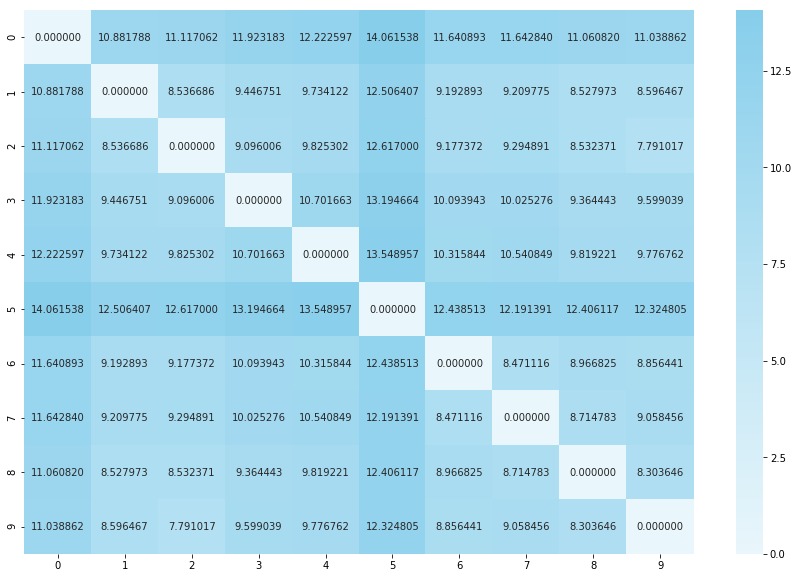

In [35]:
print('Euclidean Distance')
plt.figure(figsize=(15, 10))
sns.heatmap(euclid, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt="f")

plt.show()

Cosine Distance


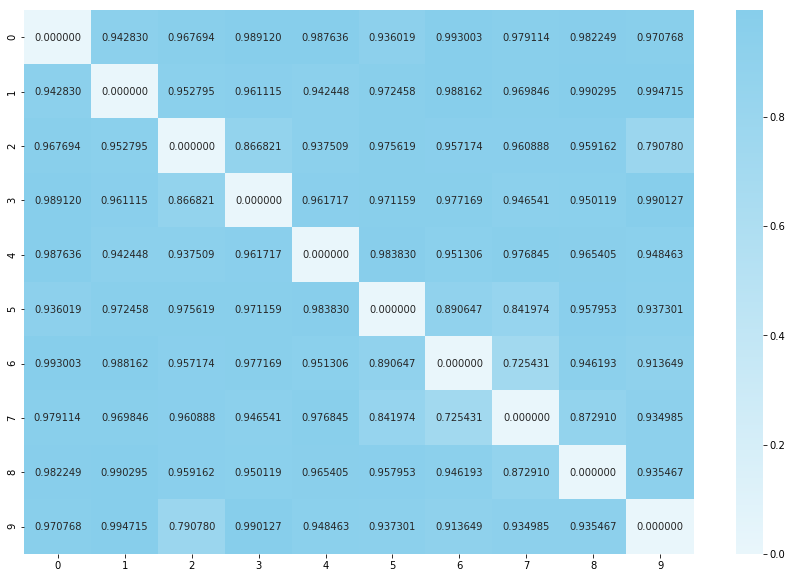

In [36]:
print('Cosine Distance')
plt.figure(figsize=(15, 10))
sns.heatmap(cosine, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt="f")

plt.show()

Manhattan Distance


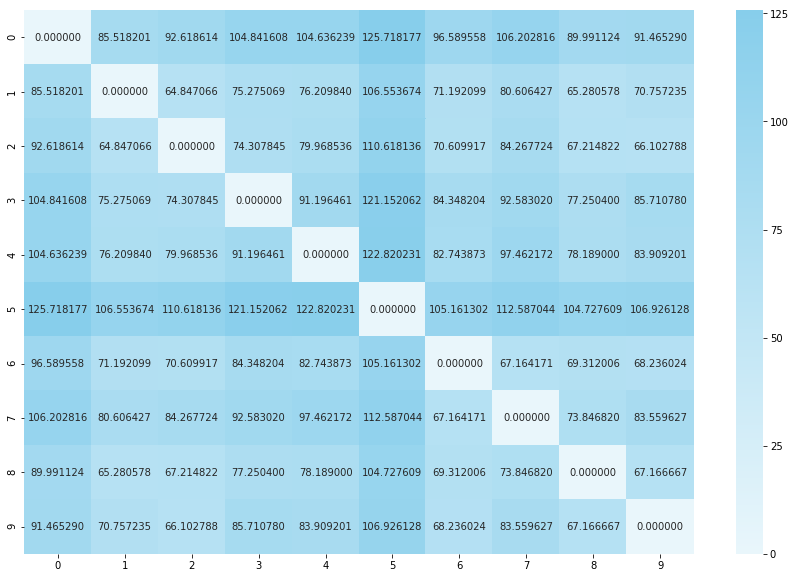

In [37]:
print('Manhattan Distance')
plt.figure(figsize=(15, 10))
sns.heatmap(manh, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt="f")

plt.show()

Jaccard Distance


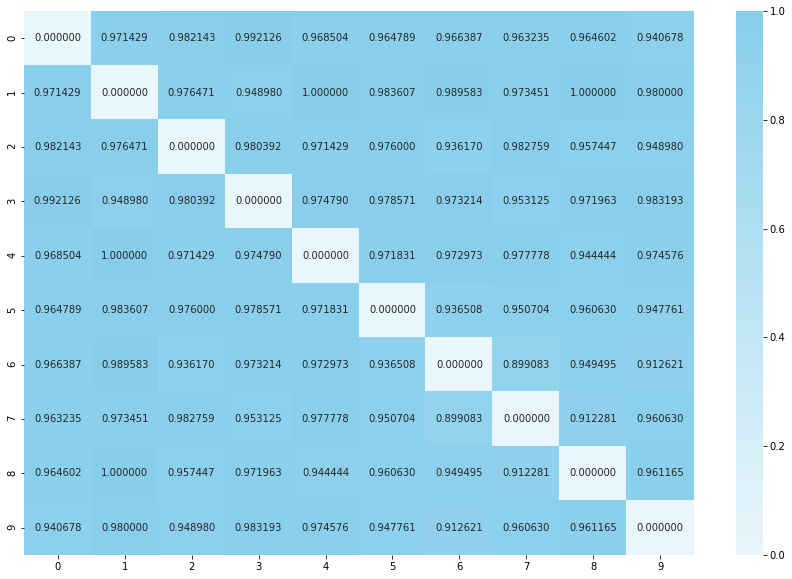

In [38]:
print('Jaccard Distance')
plt.figure(figsize=(15, 10))
sns.heatmap(jaccard, cmap=sns.light_palette("skyblue", as_cmap=True), annot=True, fmt="f")

plt.show()

#### Find two most simliar documents
We conclude 'cosine distance' is the best method and choose it after comparing result of respective distances method by ourselves.

In [39]:
cosine[cosine>0].min()

0.7254312479120254

In [40]:
data['contents'].iloc[6]

'in principle, reinforcement learning and policy search methods can enable robots to learn highly complex and general skills that may allow them to function amid the complexity and diversity of the real world. however, training a policy that generalizes well across a wide range of real  world conditions requires far greater quantity and diversity of experience than is practical to collect with a single robot. fortunately, it is possible for multiple robots to share their experience with one another, and thereby, learn a policy collectively. in this work, we explore distributed and asynchronous policy learning as a means to achieve generalization and improved training times on challenging, real  world manipulation tasks. we propose a distributed and asynchronous version of guided policy search and use it to demonstrate collective policy learning on a vision  based door opening task using four robots. we show that it achieves better generalization, utilization, and training times than th

In [41]:
data['contents'].iloc[7]

'reinforcement learning holds the promise of enabling autonomous robots to learn large repertoires of behavioral skills with minimal human intervention. however, robotic applications of reinforcement learning often compromise the autonomy of the learning process in favor of achieving training times that are practical for real physical systems. this typically involves introducing hand  engineered policy representations and human  supplied demonstrations. deep reinforcement learning alleviates this limitation by training general  purpose neural network policies, but applications of direct deep reinforcement learning algorithms have so far been restricted to simulated settings and relatively simple tasks, due to their apparent high sample complexity. in this paper, we demonstrate that a recent deep reinforcement learning algorithm based on off  policy training of deep  distributions can scale to complex 3d manipulation tasks and can learn deep neural network policies efficiently enough to

In [42]:
data['title'].iloc[6]

'collective robot reinforcement learning with distributed asynchronous guided policy search'

In [43]:
data['title'].iloc[7]

'deep reinforcement learning for robotic manipulation with asynchronous off  policy updates'

#####  
4.2. For each document, list the top 3 most similar documents and the corresponding similarity. 

In [44]:
for i in range(0,10): 
    print('Document ', i)
    indices = cosine[i].argsort()[1:4]
    similarities = cosine[i][indices]
    print(indices, '\n', similarities, '\n\n')

Document  0
[5 1 2] 
 [ 0.93601892  0.94282953  0.96769432] 


Document  1
[4 0 2] 
 [ 0.94244833  0.94282953  0.95279453] 


Document  2
[9 3 4] 
 [ 0.79078048  0.86682062  0.93750942] 


Document  3
[2 7 8] 
 [ 0.86682062  0.94654105  0.95011889] 


Document  4
[2 1 9] 
 [ 0.93750942  0.94244833  0.94846278] 


Document  5
[7 6 0] 
 [ 0.84197374  0.89064708  0.93601892] 


Document  6
[7 5 9] 
 [ 0.72543125  0.89064708  0.91364937] 


Document  7
[6 5 8] 
 [ 0.72543125  0.84197374  0.8729097 ] 


Document  8
[7 9 6] 
 [ 0.8729097   0.9354669   0.94619251] 


Document  9
[2 6 7] 
 [ 0.79078048  0.91364937  0.93498478] 


